In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
data=pd.read_csv('Iris.csv')

In [4]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data[data.columns[-1]]=le.fit_transform(data[data.columns[-1]])

In [7]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [8]:
data.drop('Id',inplace=True,axis=1)

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data[data.columns[:-1]],data[data.columns[-1]],test_size=0.2,random_state=42)

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)


In [12]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print("Accuracy:",accuracy_score(y_test,y_pred))        
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Classification Report:\n",classification_report(y_test,y_pred))

Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [23]:
accuracy=list()
for i in range(1,11):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    accuracy.append(accuracy_score(y_test,y_pred))
    print(f"Accuracy for k={i}: {accuracy_score(y_test,y_pred)}")

Accuracy for k=1: 1.0
Accuracy for k=2: 1.0
Accuracy for k=3: 1.0
Accuracy for k=4: 1.0
Accuracy for k=5: 1.0
Accuracy for k=6: 1.0
Accuracy for k=7: 1.0
Accuracy for k=8: 1.0
Accuracy for k=9: 1.0
Accuracy for k=10: 1.0


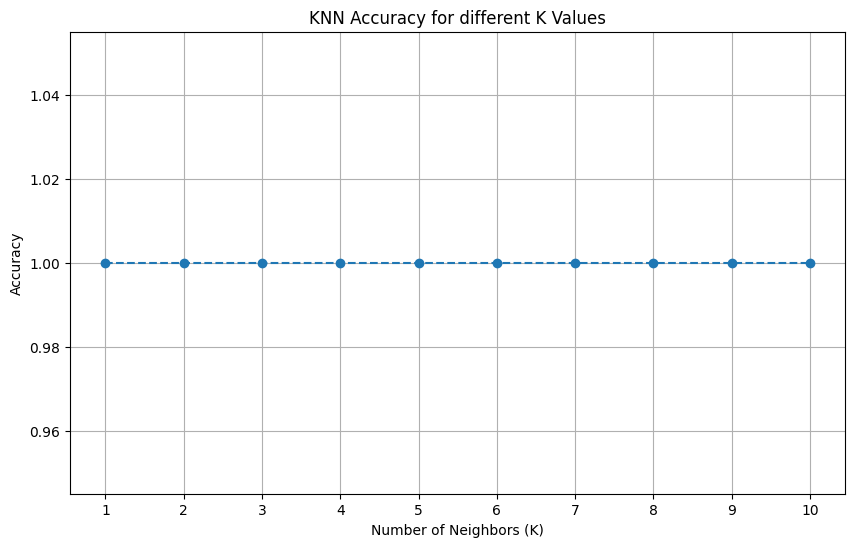

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(range(1,11), accuracy, marker='o', linestyle='dashed')
plt.title('KNN Accuracy for different K Values')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.xticks(range(1,11))
plt.grid(True)
plt.show()

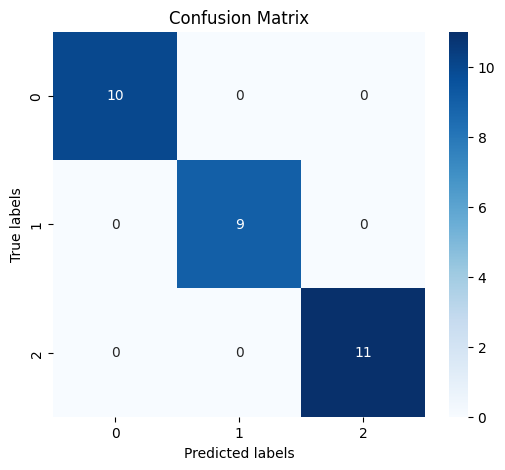

In [27]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


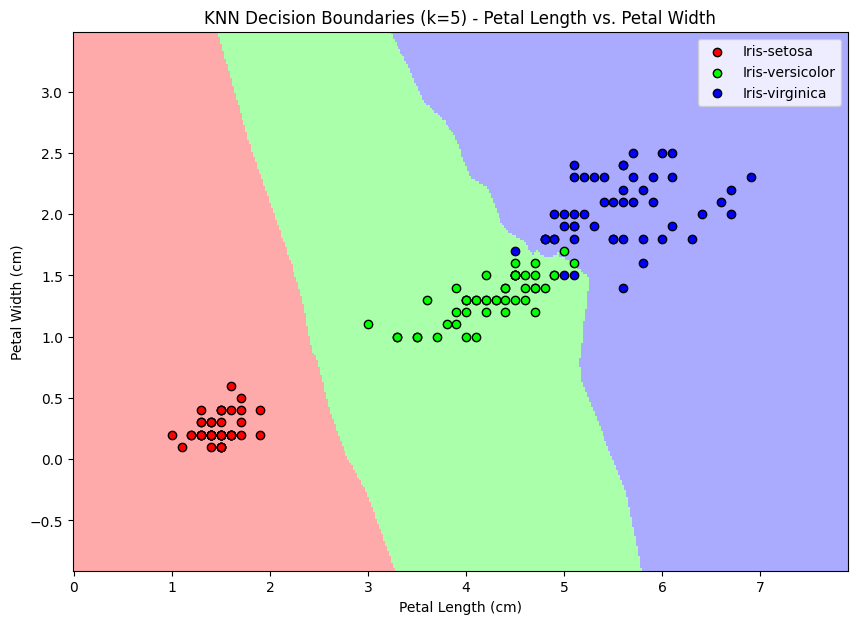

In [20]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
X_vis=data.iloc[:, [2, 3]].values
y_vis=data['Species'].values
knn_vis=KNeighborsClassifier(n_neighbors=5)
knn_vis.fit(X_vis, y_vis)

x_min, x_max=X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max=X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy=np.meshgrid(np.arange(x_min, x_max, 0.02),np.arange(y_min, y_max, h))

Z=knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z=Z.reshape(xx.shape)

cmap_light=ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold=ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

plt.figure(figsize=(10, 7))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')

species_names=le.classes_
for i, species in enumerate(species_names):
    plt.scatter(X_vis[y_vis == i, 0], X_vis[y_vis == i, 1], 
                c=cmap_bold.colors[i], label=species, edgecolor='k')

plt.title('KNN Decision Boundaries (k=5) - Petal Length vs. Petal Width')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend()
plt.show()